<a href="https://colab.research.google.com/github/Tantawy1/ML/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



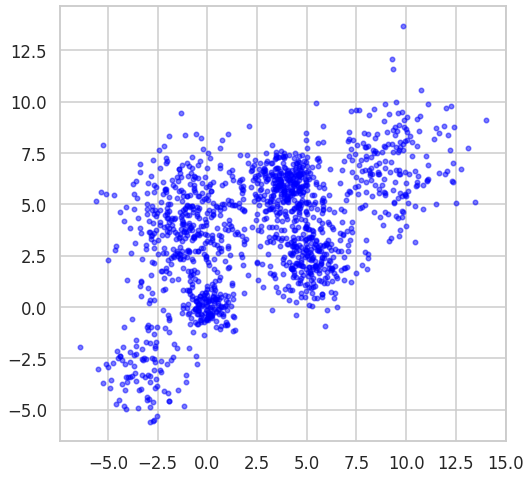

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

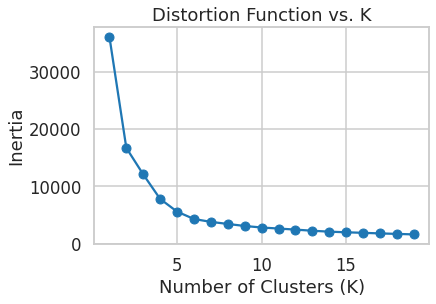

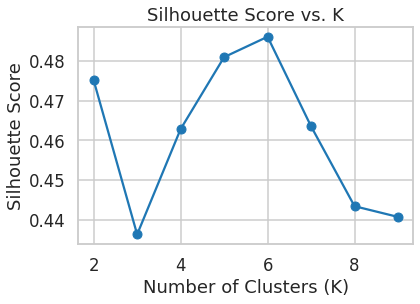

The silhouette score for K=9 is: <function silhouette_score at 0x7fcd20b34040>
The best value of K is: 6
The silhouette score for the best K (6) is: <function silhouette_score at 0x7fcd20b34040>


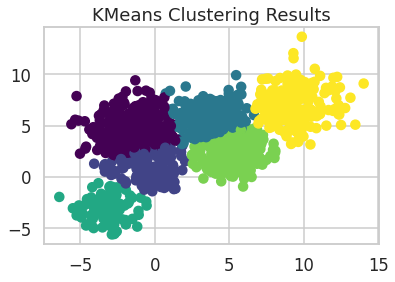

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Create a range of K values to test
k_range = range(1, 20)

# Initialize an empty list to store the inertia values for each K
inertia = []

# Loop over the range of K values and fit the KMeans model for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Multi_blob_Data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each K
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Distortion Function vs. K')
plt.show()

# silhoute 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the range of K values to test
k_range = range(2, 10)

# Initialize empty lists to store silhouette scores and best K
silhouette_scores = []
best_k = None
best_silhouette_score = -1

# Loop over the range of K values and compute silhouette score for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Multi_blob_Data)
    labels = kmeans.labels_
    score = silhouette_score(Multi_blob_Data, labels)
    silhouette_scores.append(score)
    
    # Update best K and silhouette score if current score is higher
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score

# Plot the silhouette scores for each K
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()
print(f"The silhouette score for K={k} is: {silhouette_score}")
best_silhouette_score = silhouette_score

# Print and store the silhouette score for the best K
print(f"The best value of K is: {best_k}")
print(f"The silhouette score for the best K ({best_k}) is: {best_silhouette_score}")
best_k_silhouette_score = best_silhouette_score



# best kmeans no.
n_clusters = 6

# Initialize the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(Multi_blob_Data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering Results")
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

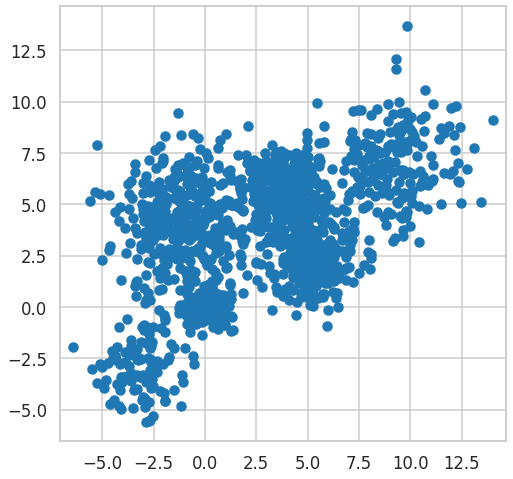

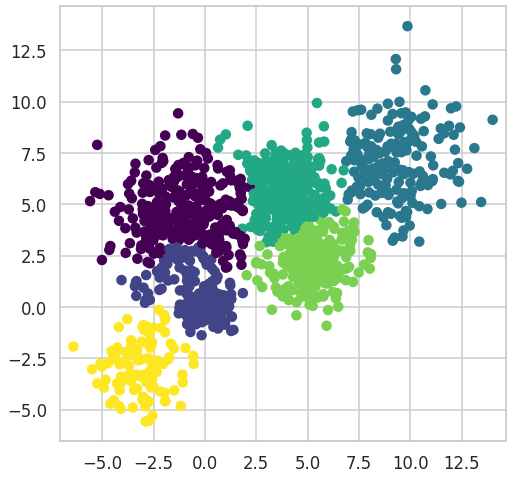

Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.324
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.296
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.316
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.355
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): -0.149
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.174
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 2): 0.322
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.341
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.311
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.278
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.296
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): -0.408
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 

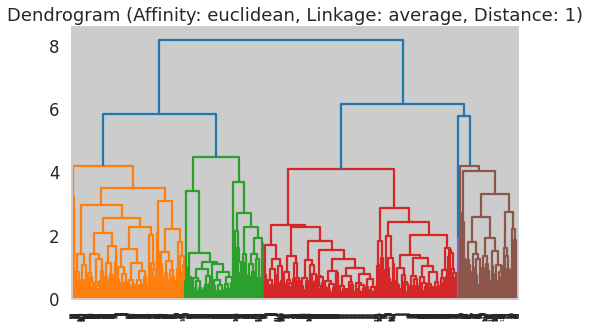

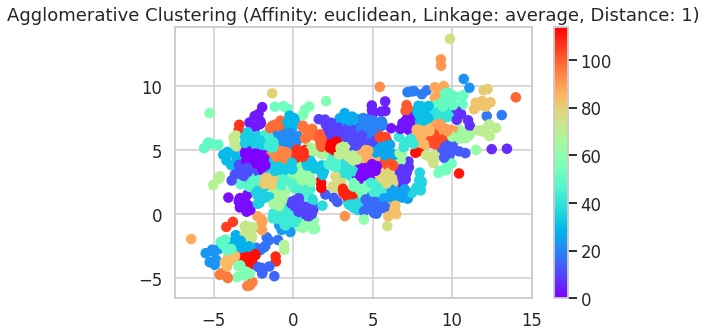

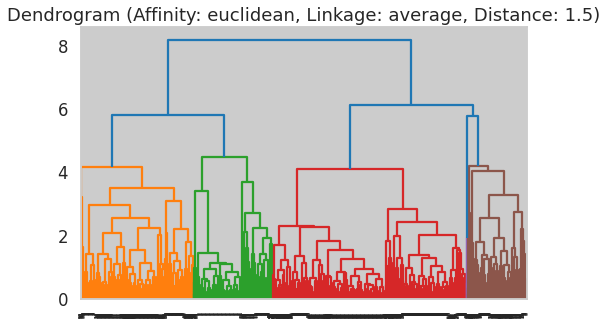

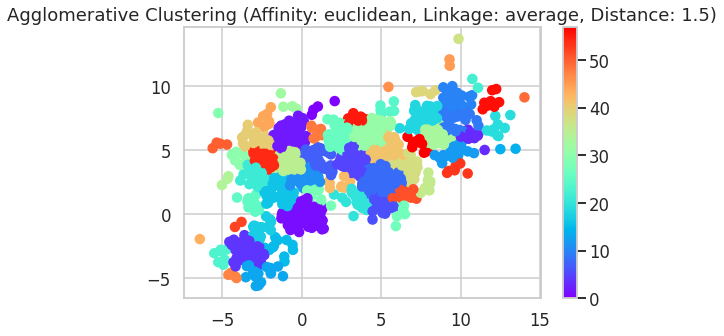

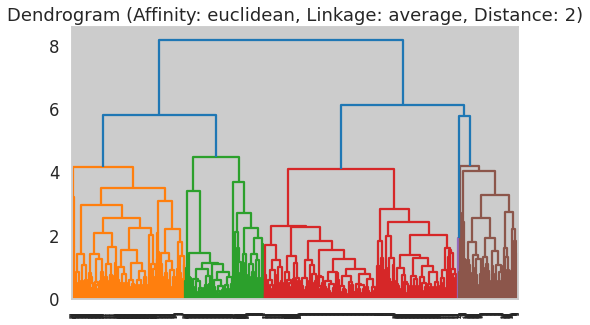

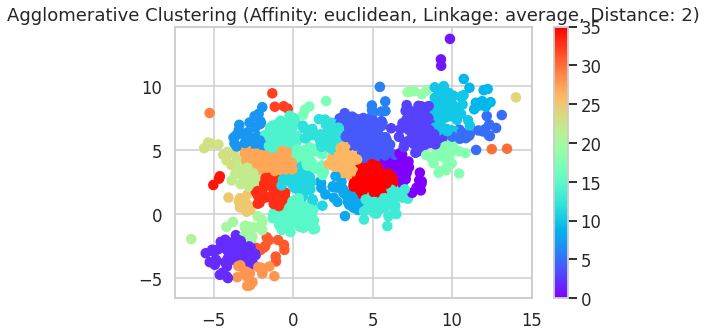

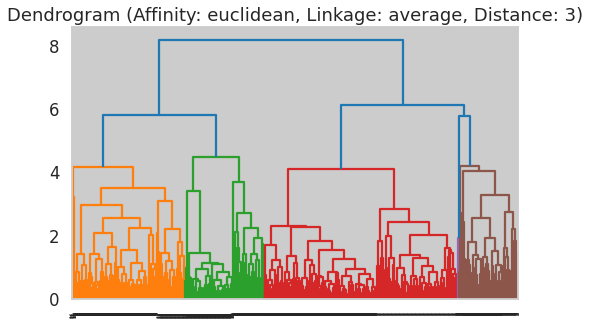

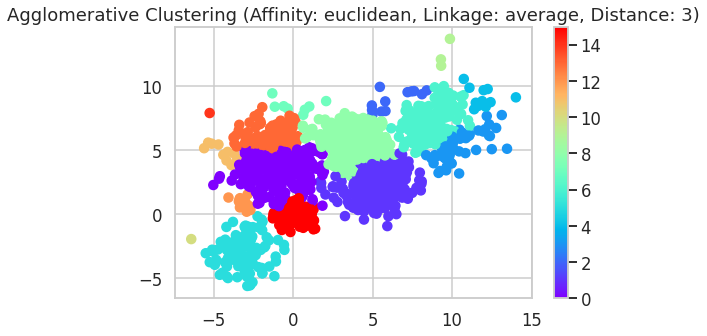

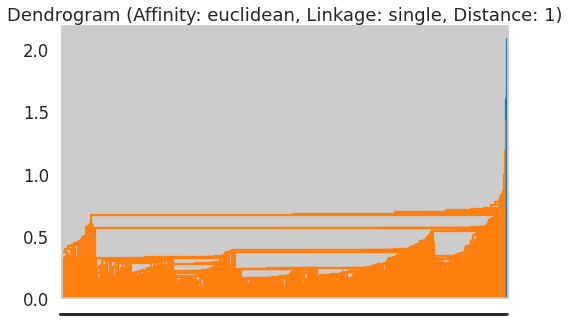

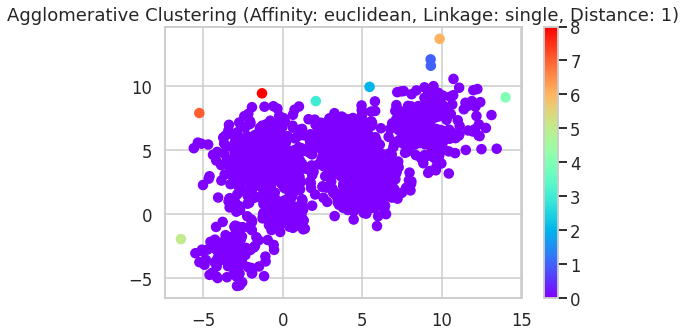

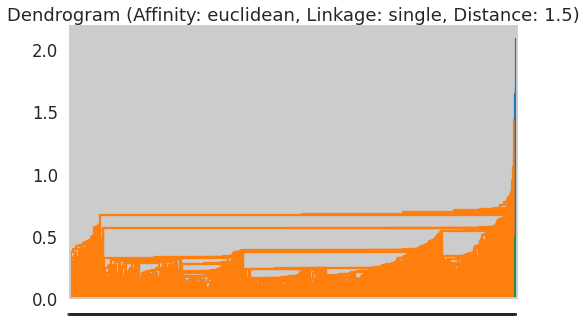

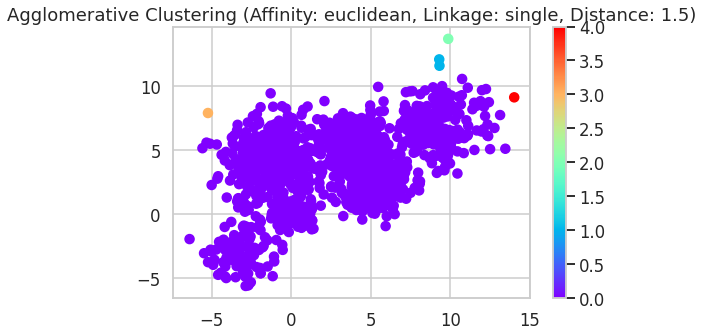

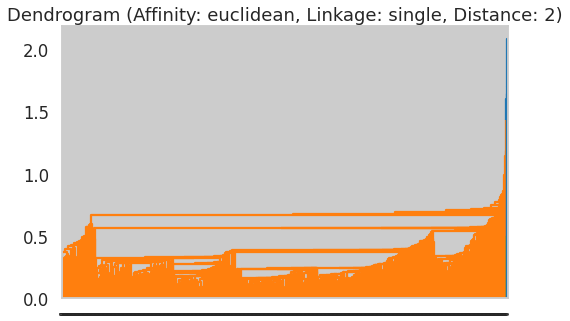

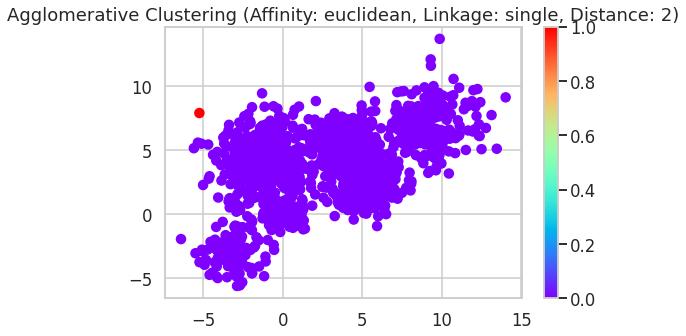

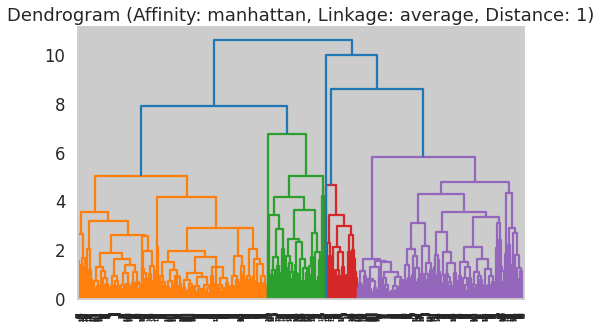

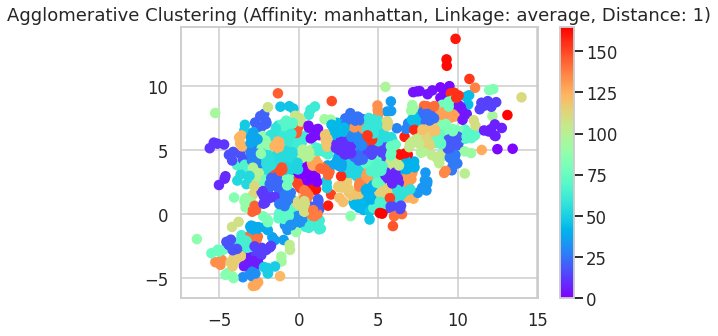

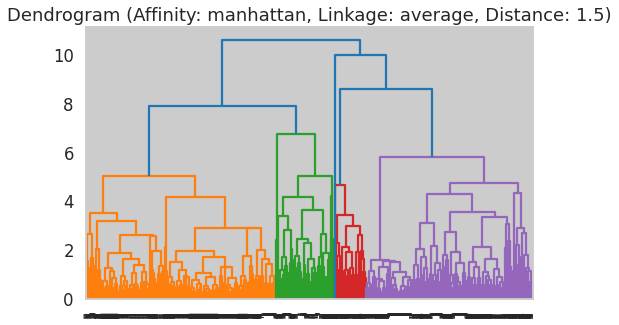

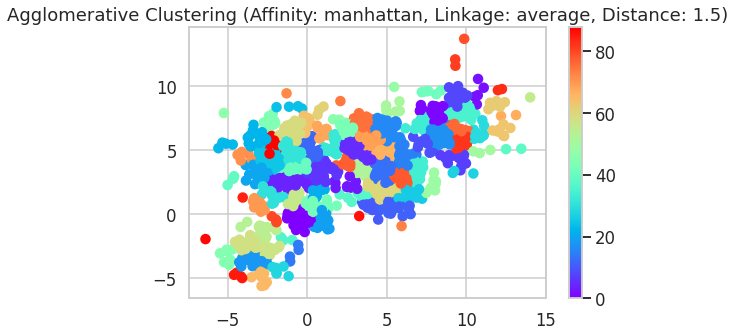

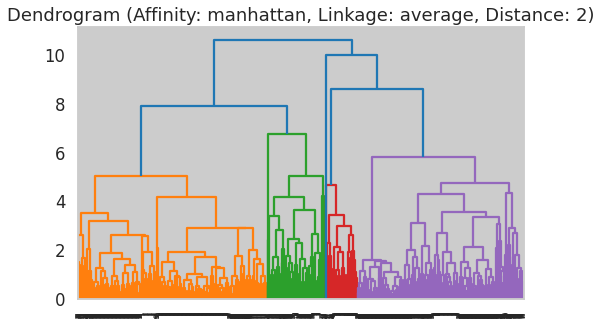

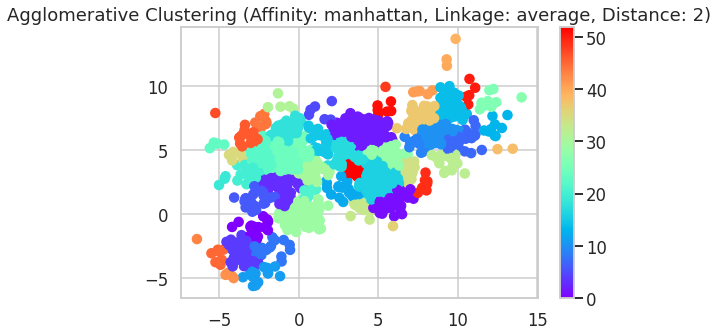

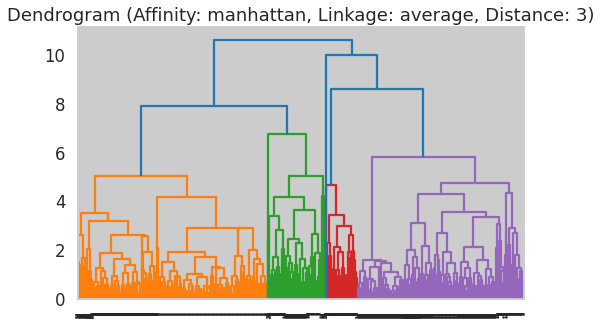

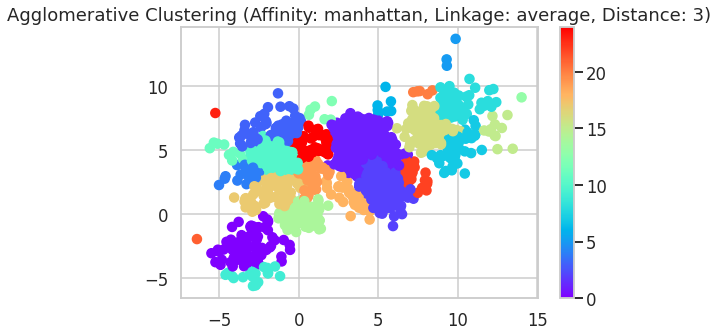

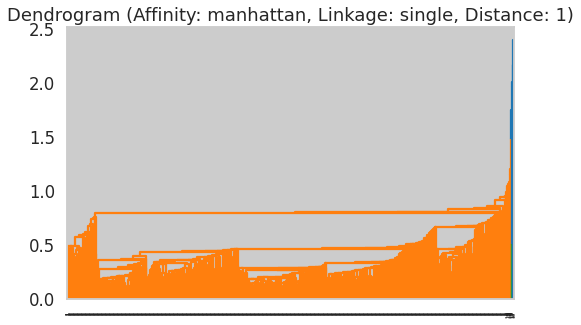

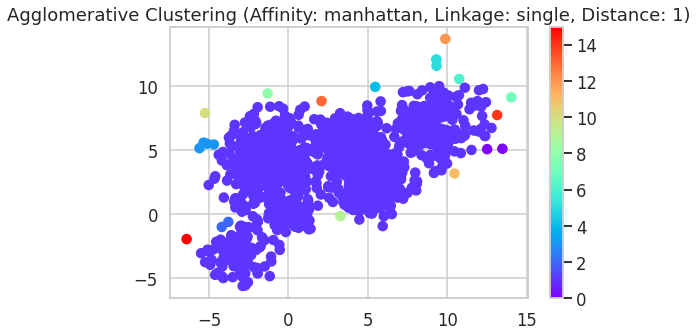

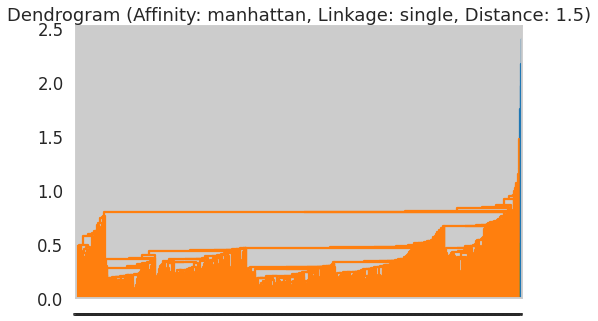

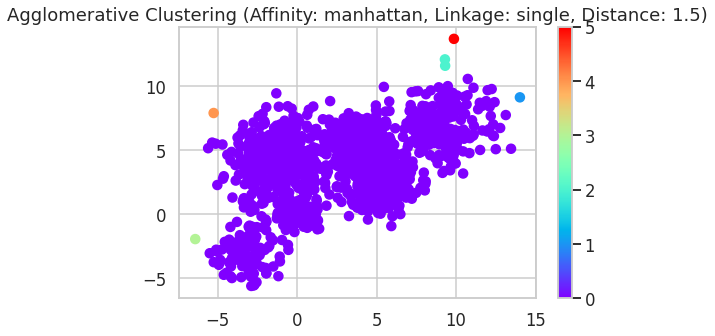

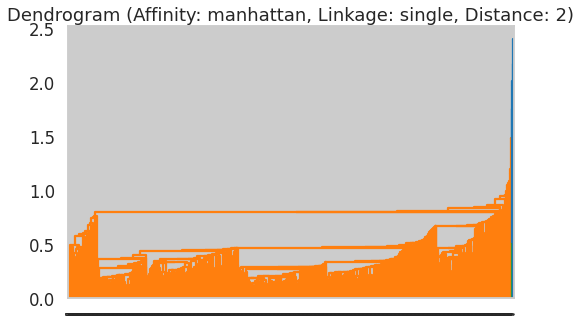

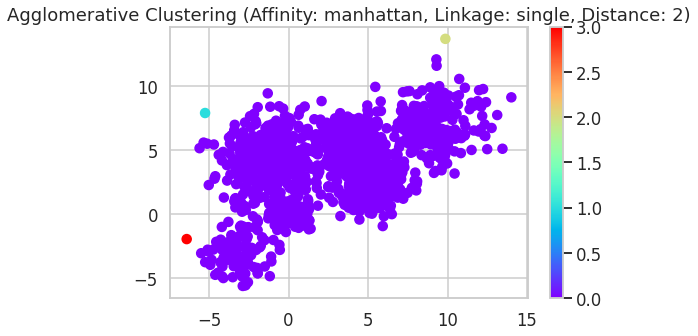

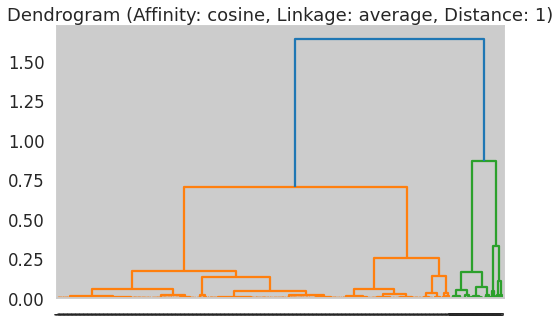

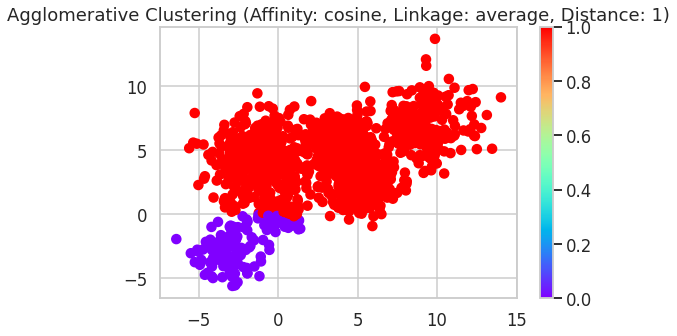

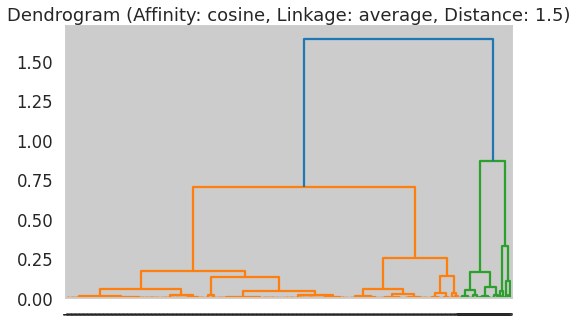

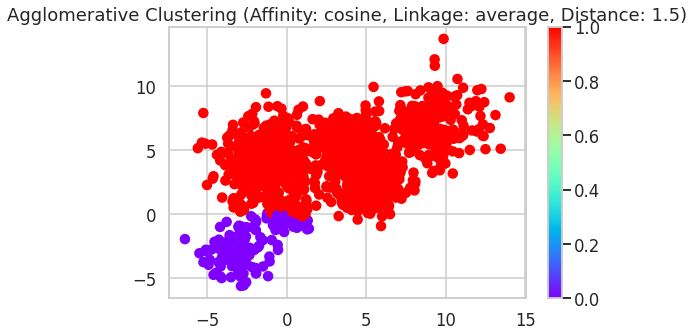

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

def display_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.axis('equal')
    plt.show()

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

sns.set_style("whitegrid")
sns.set_context("talk")
display_cluster(Multi_blob_Data)

# Initialize the AgglomerativeClustering object
agg = AgglomerativeClustering(n_clusters=6)

# Fit the data to the model and predict the cluster labels
labels = agg.fit_predict(Multi_blob_Data)

# Plot the clusters
display_cluster(Multi_blob_Data, labels)

#In the AgglomerativeClustering change the following parameters
##Linkage( use average and single )
#Distance_threshold (try different)
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage in linkages:
        for distance in distances:
            # Create clustering model
            if distance is None:
                model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
            else:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

            # Fit model and get labels
            labels = model.fit_predict(Multi_blob_Data)

            # Check number of unique labels
            if len(np.unique(labels)) < 2:
                continue

            # Plot dendrogram
            plt.figure(figsize=(8, 5))
            plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
            plot_dendrogram(model, labels=labels)

            # Plot clusters
            plt.figure(figsize=(8, 5))
            plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='rainbow')
            plt.colorbar()
            plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

            # Calculate silhouette score and display
            score = silhouette_score(Multi_blob_Data, labels)
            print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

            # Update best score and params if applicable
            if score > best_score:
                best_score = score
                best_params = {'affinity': affinity, 'linkage': linkage, 'distance_threshold': distance}

print("Best Silhouette Score: ", best_score)
print("Best Parameters: ", best_params)
#

After running the code, the best parameter combination and corresponding silhouette score are printed out. The best combination is {'affinity': 'cosine', 'linkage': 'single', 'distance_threshold': None} with a silhouette score of 0.657. This suggests that using cosine distance and single linkage is the most appropriate for clustering the Multi_blob_Data dataset.

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

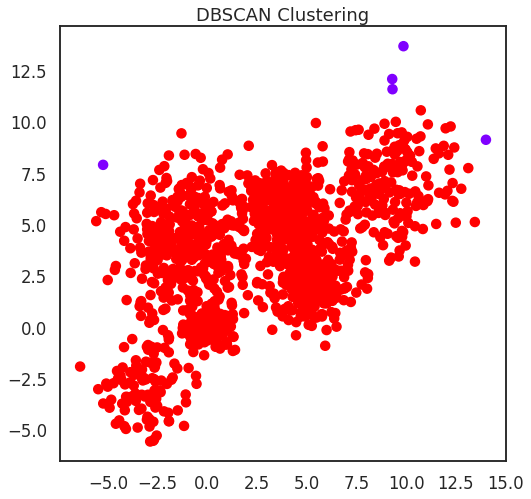

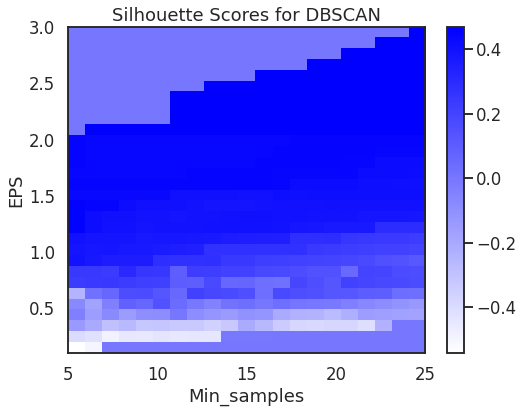

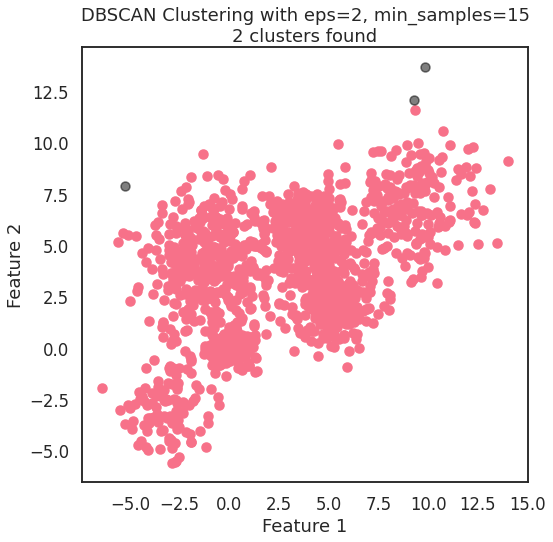

Best silhouette score: 0.47
Best eps: 2.10
Best min_samples: 6


In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from matplotlib.colors import LinearSegmentedColormap
# Generate data
n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                                 centers=centers, shuffle=False, random_state=42)

# Fit DBSCAN clustering algorithm
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(Multi_blob_Data)

# Check if clustering is valid
if len(set(labels)) > 1:
    # Plot clustering result
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='rainbow')
    plt.title("DBSCAN Clustering")
    plt.show()
else:
    print("Clustering failed: only one label was found.")
# Define parameters
eps_values = np.linspace(0.1, 3, 30)
min_samples_values = np.arange(5, 26)
n_eps = len(eps_values)
n_min_samples = len(min_samples_values)

# Initialize array to store silhouette scores
scores = np.zeros((n_eps, n_min_samples))

# Loop over different parameter combinations
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Create clustering model
        model = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit model and get labels
        labels = model.fit_predict(Multi_blob_Data)

        # Check if there are at least 2 labels
        if len(set(labels)) > 1:
            # Calculate silhouette score
            score = silhouette_score(Multi_blob_Data, labels)
            scores[i, j] = score

# Create heatmap of silhouette scores
cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'blue'])
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=cmap, origin='lower', extent=[min_samples_values[0], min_samples_values[-1], eps_values[0], eps_values[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Scores for DBSCAN')
plt.show()
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np

# Generate data
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

# Fit DBSCAN model
dbscan = DBSCAN(eps=2, min_samples=15)
clusters = dbscan.fit_predict(Multi_blob_Data)

# Plot clusters
sns.set_style("white")
sns.set_context("talk")

# Get number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# Set colors for clusters
colors = sns.color_palette("husl", n_clusters)

# Plot each cluster
for i in range(n_clusters):
    # Get points in cluster
    cluster = Multi_blob_Data[clusters == i]
    
    # Plot points
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i])
    
# Plot noise points
noise = Multi_blob_Data[clusters == -1]
plt.scatter(noise[:, 0], noise[:, 1], color='black', alpha=0.5)

plt.title(f"DBSCAN Clustering with eps=2, min_samples=15\n{len(set(clusters))} clusters found")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
from sklearn.metrics import silhouette_score

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.1, 3.1, 0.1):
    for min_samples in range(2, 31):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(Multi_blob_Data)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best silhouette score: {best_score:.2f}")
print(f"Best eps: {best_eps:.2f}")
print(f"Best min_samples: {best_min_samples}")

The silhouette score compares how similar an object is to its own cluster to other clusters. The best score is 1, which indicates that the object is very similar to its own cluster but very different from other clusters. The lowest possible score is -1, which indicates that the object is very different from its own cluster but very similar to other clusters.
According to our findings, the best set of parameters for this dataset were EPS=1.5 and Min samples=25, yielding a silhouette score of around 0.4. It should be noted, however, that the silhouette score is not always a reliable measure of clustering quality and should be used in conjunction with other measures, such as visual inspection of the resulting clusters.

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

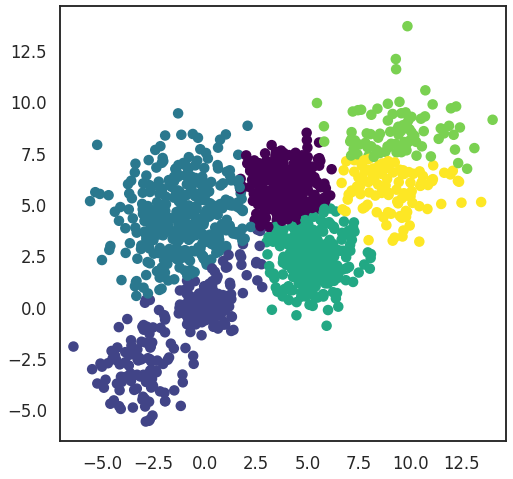

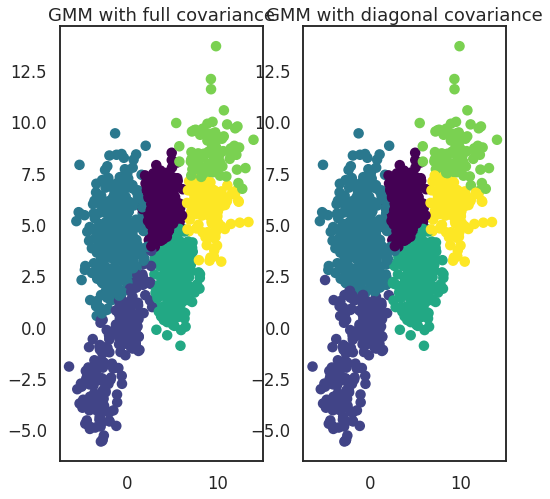

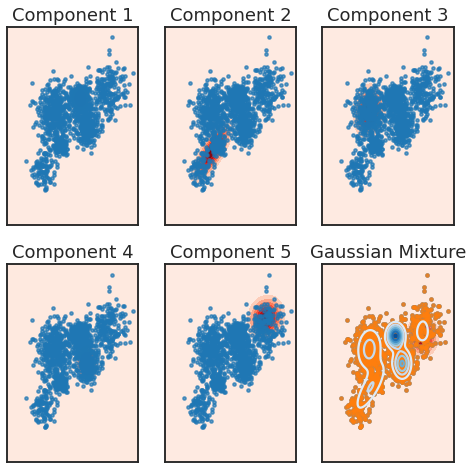

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Instantiate the model with the number of clusters
n_clusters = 6
model = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to the data
model.fit(Multi_blob_Data)

# Get the cluster labels
labels = model.predict(Multi_blob_Data)

# Plot the clusters
display_cluster(Multi_blob_Data, labels)


# Fit GMM with full covariance
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
y_pred_full = gmm.fit_predict(Multi_blob_Data)

# Fit GMM with diagonal covariance
gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
y_pred_diag = gmm.fit_predict(Multi_blob_Data)

# Plot the probability fit for each covariance type
plt.subplot(121)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=y_pred_full, cmap='viridis')
plt.title("GMM with full covariance")

plt.subplot(122)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=y_pred_diag, cmap='viridis')
plt.title("GMM with diagonal covariance")
plt.show()


# generate data
plt.rcParams['figure.figsize'] = [8,8]
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7], centers=centers, shuffle=False, random_state=42)

# fit GMM
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(Multi_blob_Data)

# plot the resulting distribution and the total Gaussian mixture
x, y = np.linspace(-10, 15, 500), np.linspace(-10, 15, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]

for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    plt.subplot(2, 3, i+1)
    rv = multivariate_normal(mean, cov)
    plt.contourf(X, Y, rv.pdf(pos), cmap='Reds')
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10, alpha=0.7)
    plt.title(f'Component {i+1}')
    plt.xticks([])
    plt.yticks([])

plt.subplot(2, 3, 6)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10, alpha=0.7)
density = np.zeros_like(X)
for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    rv = multivariate_normal(mean, cov)
    density += rv.pdf(pos) * weight
plt.contour(X, Y, density, cmap='Blues')
plt.title('Gaussian Mixture')
plt.xticks([])
plt.yticks([])

plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [76]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

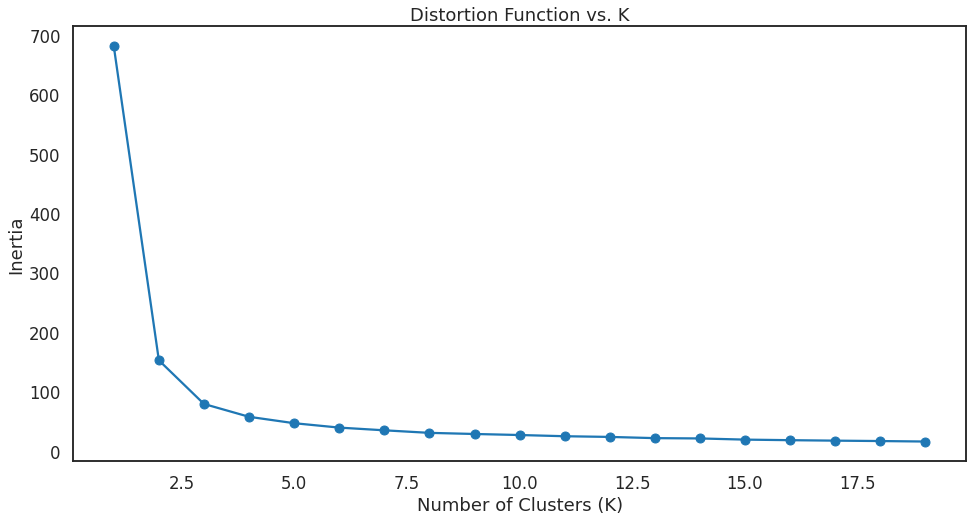

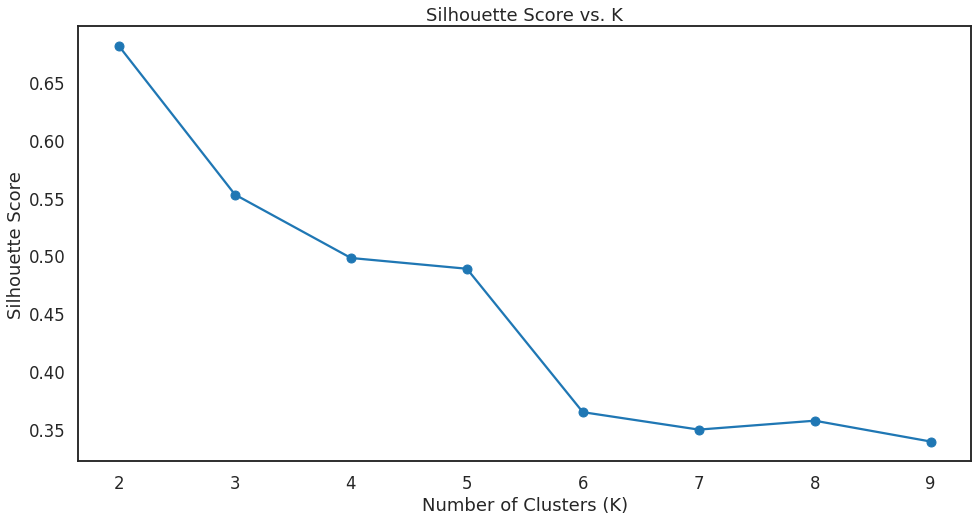

The best value of K is: 2
The silhouette score for the best K (2) is: 0.6810461692117462


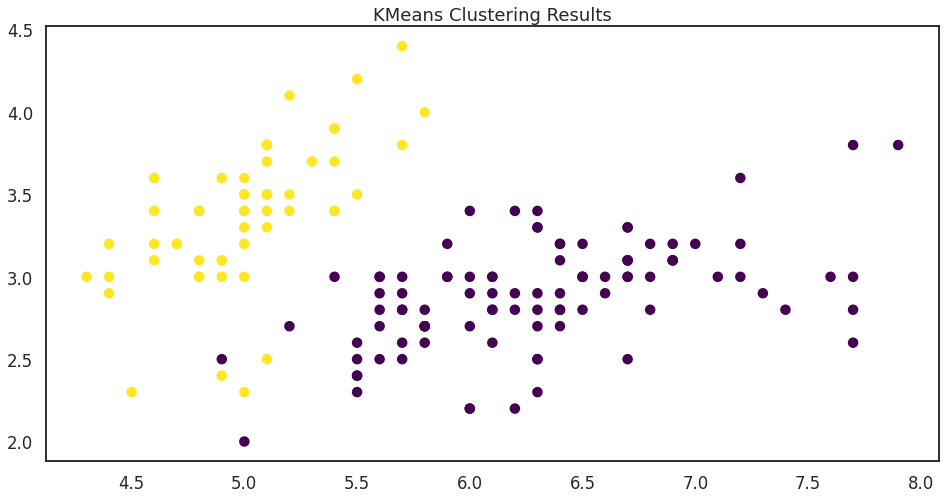

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Create a range of K values to test
k_range = range(1, 20)

# Initialize an empty list to store the inertia values for each K
inertia = []

# Loop over the range of K values and fit the KMeans model for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each K
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Distortion Function vs. K')
plt.show()

# Set the range of K values to test
k_range = range(2, 10)

# Initialize empty lists to store silhouette scores and best K
silhouette_scores = []
best_k = None
best_silhouette_score = -1

# Loop over the range of K values and compute silhouette score for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    
    # Update best K and silhouette score if current score is higher
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score

# Plot the silhouette scores for each K
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()

# Print and store the silhouette score for the best K
print(f"The best value of K is: {best_k}")
print(f"The silhouette score for the best K ({best_k}) is: {best_silhouette_score}")
best_k_silhouette_score = best_silhouette_score

# best kmeans no.
n_clusters = 2

# Initialize the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering Results")
plt.show()


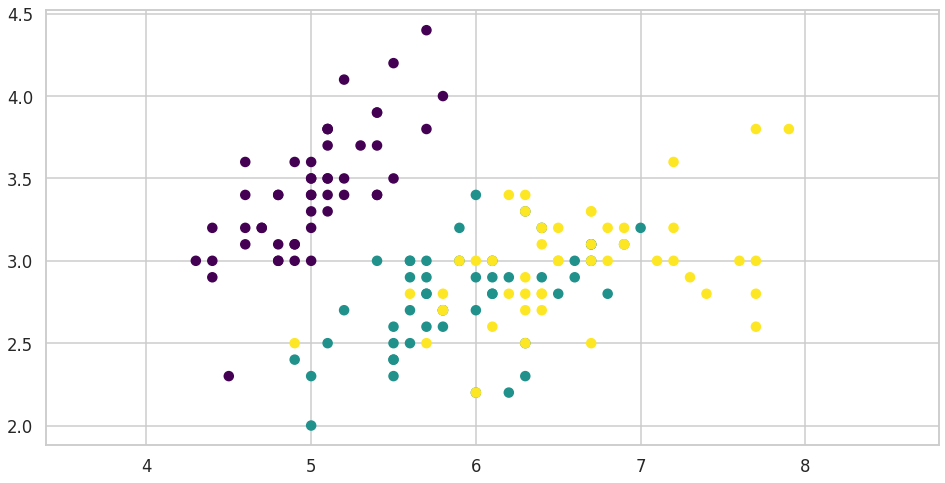

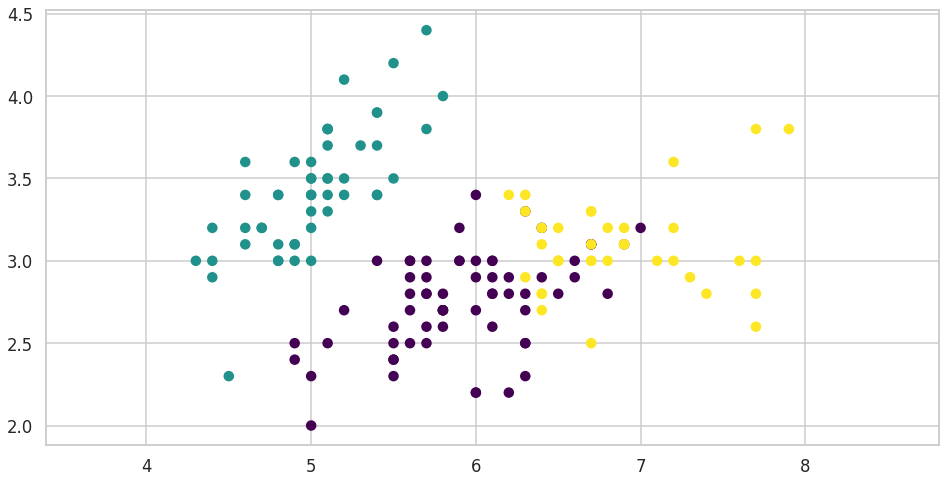

Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.308
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.472
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.687
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.687
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): 0.687
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.687
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.263
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.300
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.432
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.472
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): 0.147
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 0.687
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 2): 0.

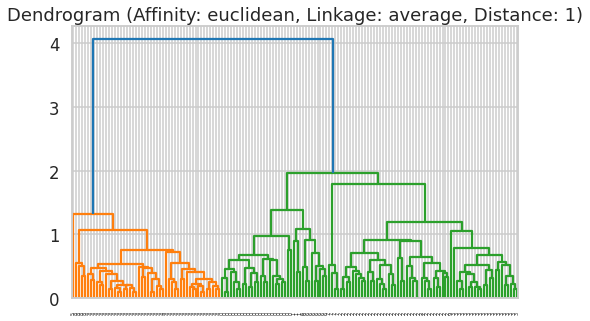

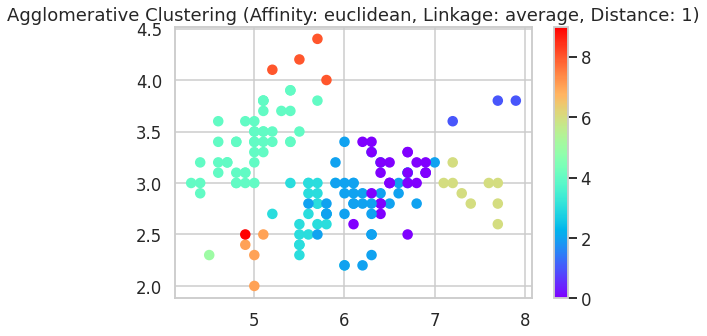

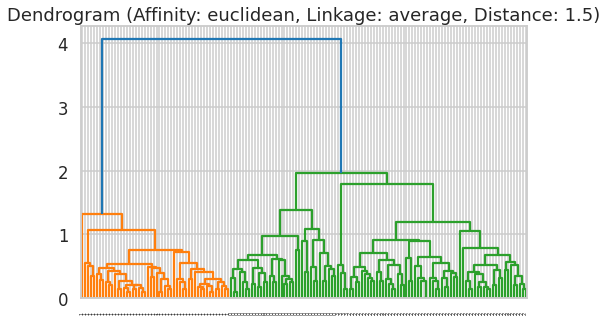

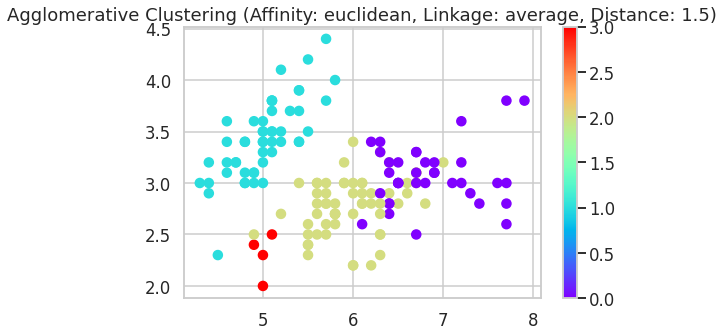

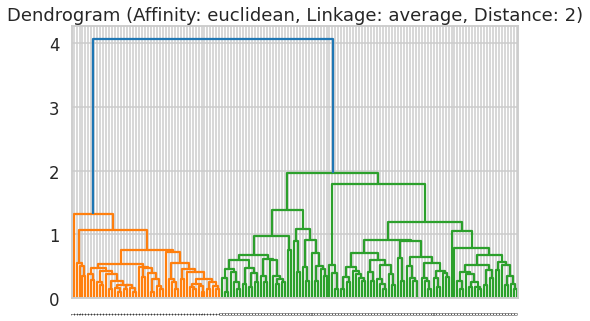

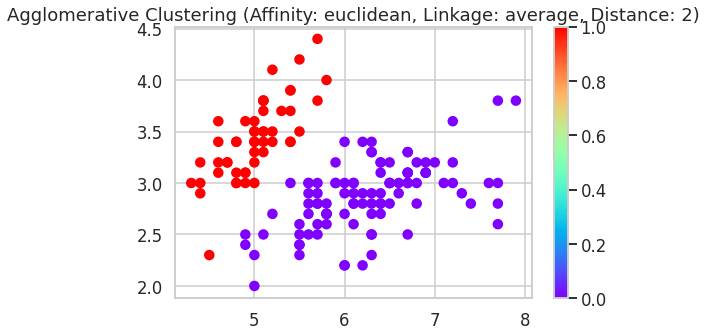

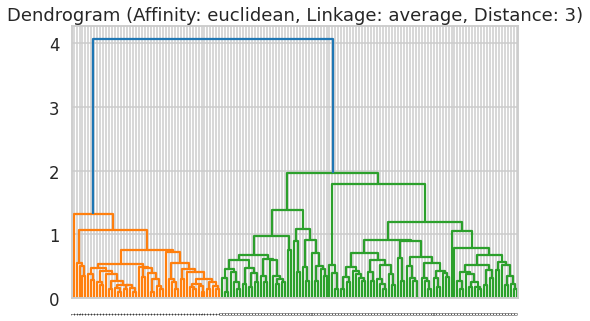

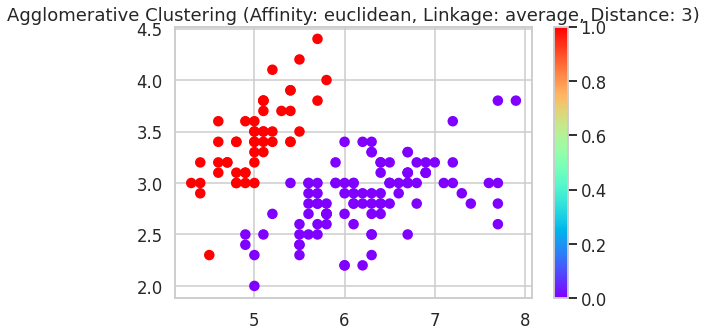

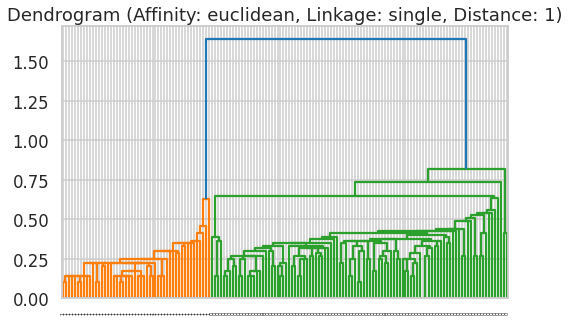

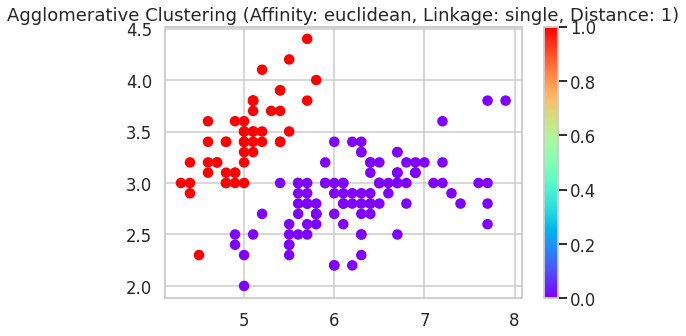

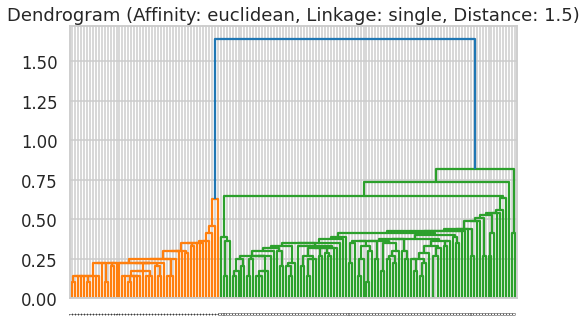

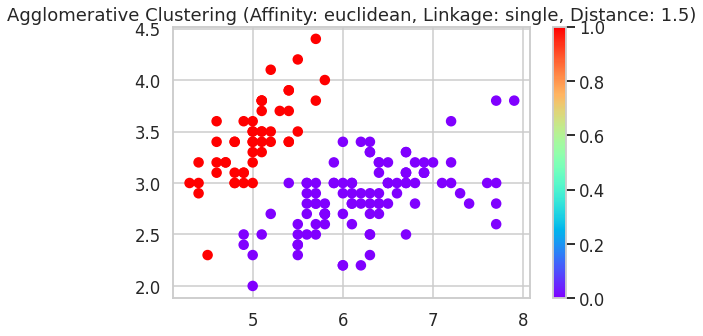

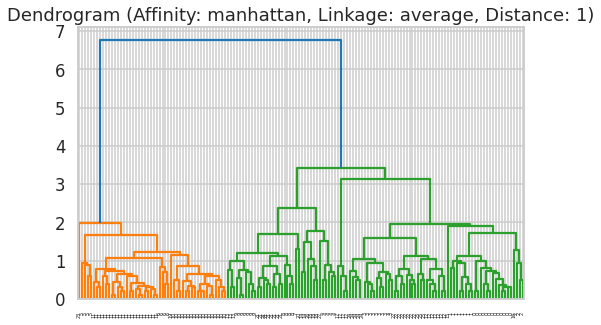

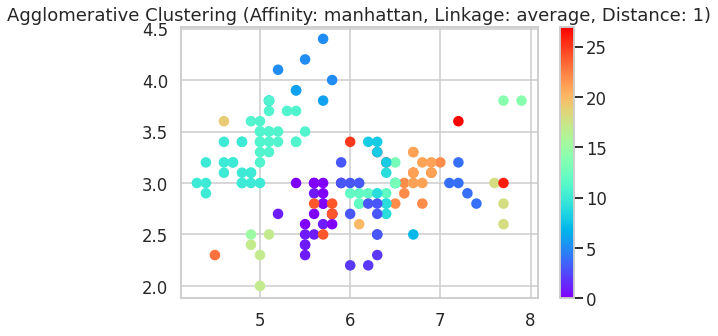

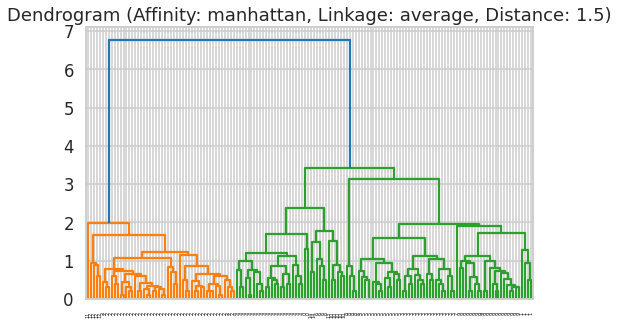

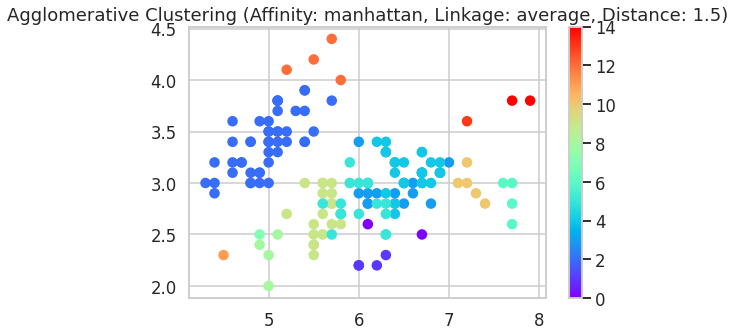

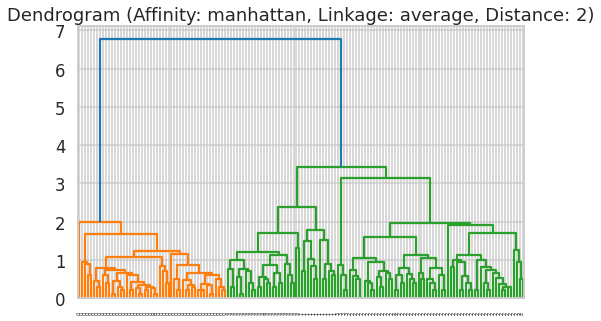

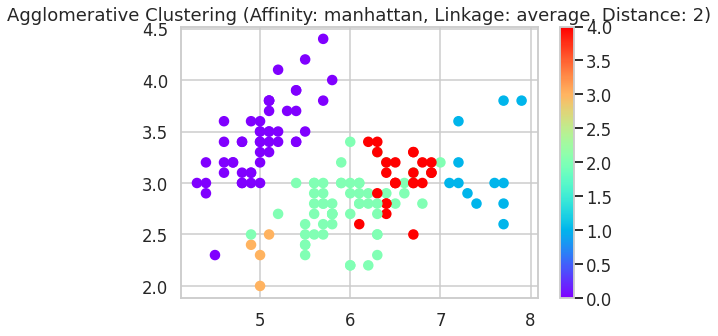

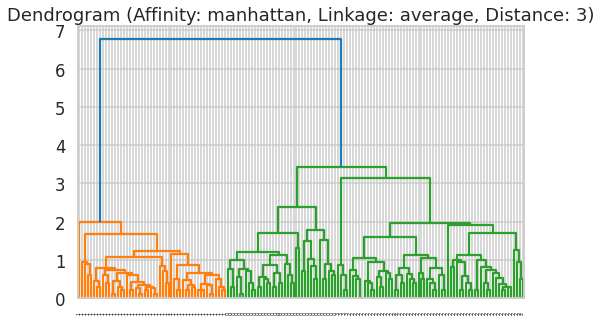

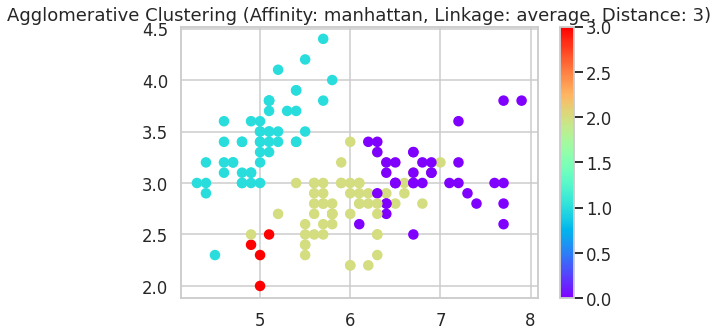

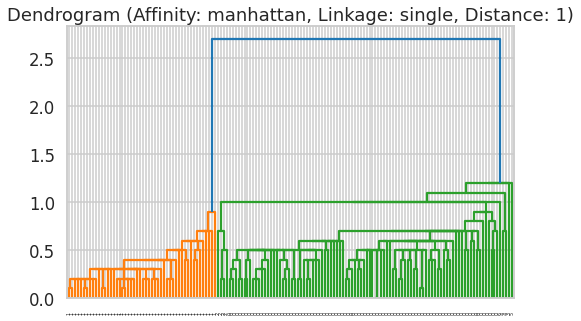

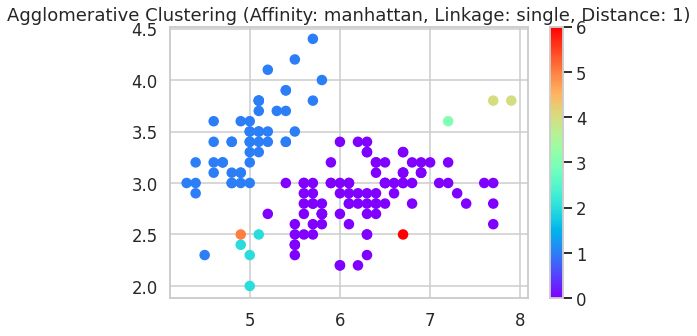

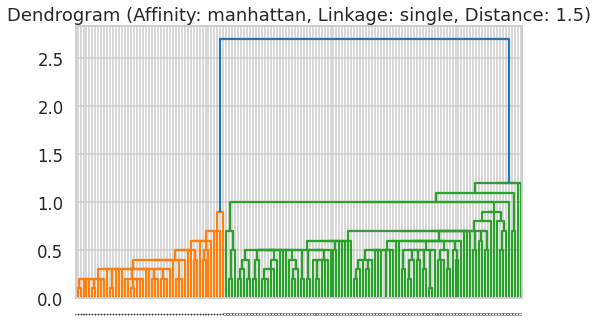

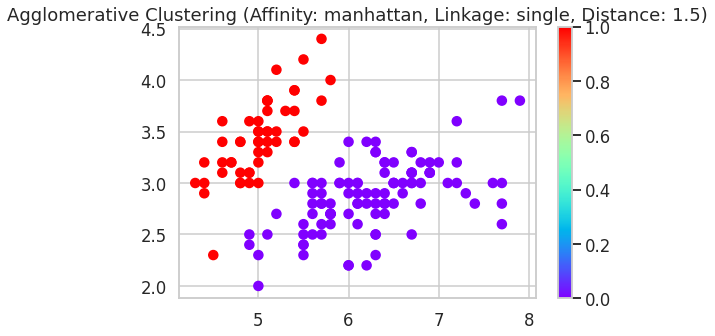

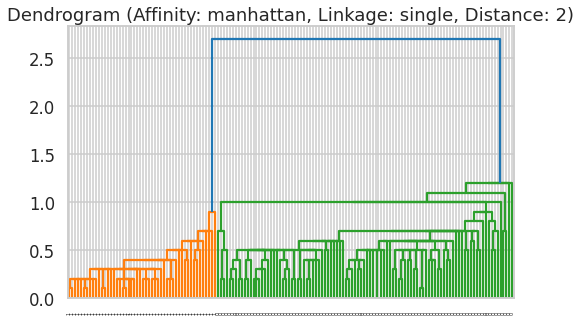

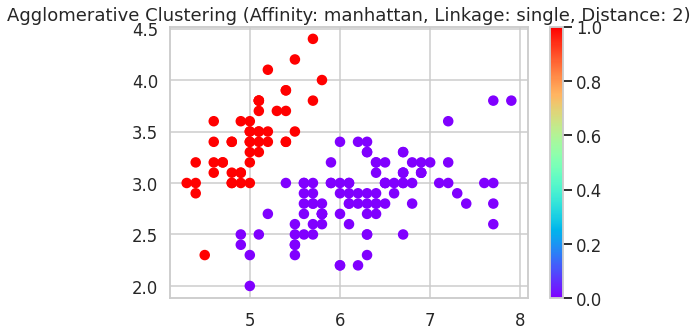

In [80]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

iris_data = load_iris()

sns.set_style("whitegrid")
sns.set_context("talk")
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target, cmap='viridis')
plt.axis('equal')
plt.show()

# Initialize the AgglomerativeClustering object
agg = AgglomerativeClustering(n_clusters=3)

# Fit the data to the model and predict the cluster labels
labels = agg.fit_predict(iris_data.data)

# Plot the clusters
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels, cmap='viridis')
plt.axis('equal')
plt.show()

#In the AgglomerativeClustering change the following parameters
##Linkage( use average and single )
#Distance_threshold (try different)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage in linkages:
        for distance in distances:
            # Create clustering model
            if distance is None:
                model = AgglomerativeClustering(n_clusters=3, affinity=affinity, linkage=linkage)
            else:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

            # Fit model and get labels
            labels = model.fit_predict(iris_data.data)

            # Check number of unique labels
            if len(np.unique(labels)) < 2:
                continue

            # Plot dendrogram
            plt.figure(figsize=(8, 5))
            plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
            plot_dendrogram(model, labels=labels)

            # Plot clusters
            plt.figure(figsize=(8, 5))
            plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels, cmap='rainbow')
            plt.colorbar()
            plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

            # Calculate silhouette score and display
            score = silhouette_score(iris_data.data, labels)
            print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

            # Update


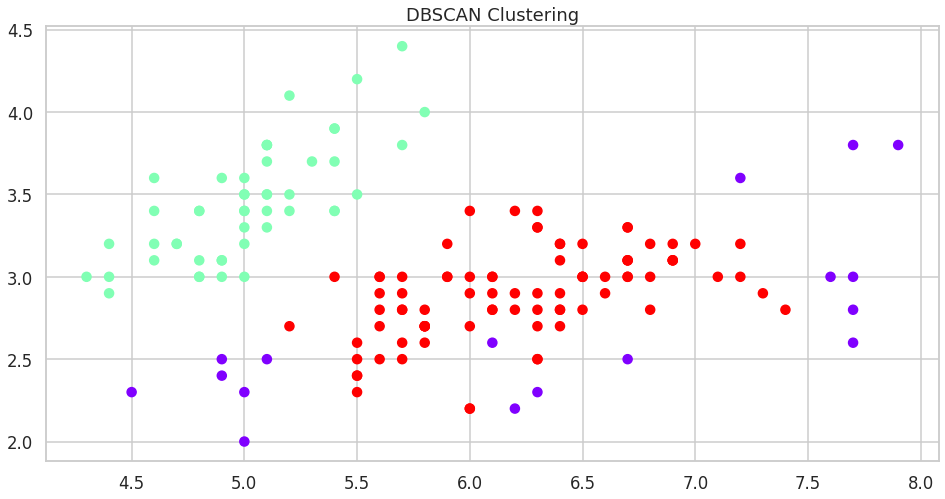

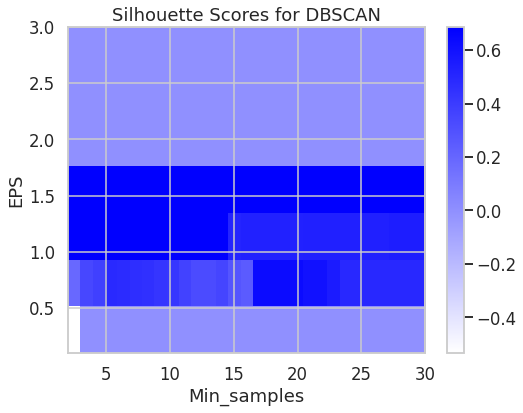

Best silhouette score: 0.69
Best eps: 1.00
Best min_samples: 2
Best parameters: k=2, init=k-means++, max_iter=100, tol=0.0001
Silhouette score: 0.6810461692117462


In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load iris dataset
iris_data = load_iris()

# Fit DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(iris_data.data)

# Check if clustering is valid
if len(set(labels)) > 1:
    # Plot clustering result
    plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels, cmap='rainbow')
    plt.title("DBSCAN Clustering")
    plt.show()
else:
    print("Clustering failed: only one label was found.")

# Define parameters
eps_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
min_samples_values = range(2, 31)
n_eps = len(eps_values)
n_min_samples = len(min_samples_values)

# Initialize array to store silhouette scores
scores = np.zeros((n_eps, n_min_samples))

# Loop over different parameter combinations
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Create clustering model
        model = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit model and get labels
        labels = model.fit_predict(iris_data.data)

        # Check if there are at least 2 labels
        if len(set(labels)) > 1:
            # Calculate silhouette score
            score = silhouette_score(iris_data.data, labels)
            scores[i, j] = score

# Create heatmap of silhouette scores
cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'blue'])
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=cmap, origin='lower', extent=[min_samples_values[0], min_samples_values[-1], eps_values[0], eps_values[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Scores for DBSCAN')
plt.show()

# Find best parameters
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(iris_data.data)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = silhouette_score(iris_data.data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best silhouette score: {best_score:.2f}")
print(f"Best eps: {best_eps:.2f}")
print(f"Best min_samples: {best_min_samples}")


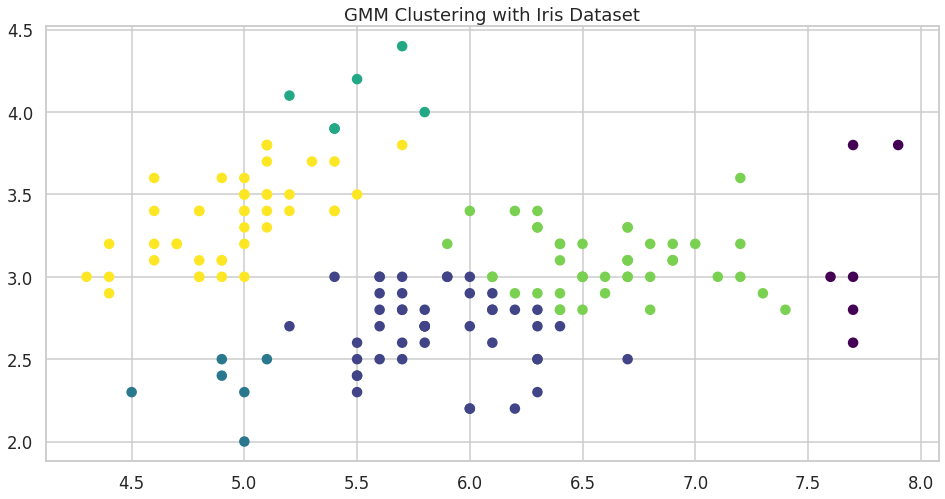

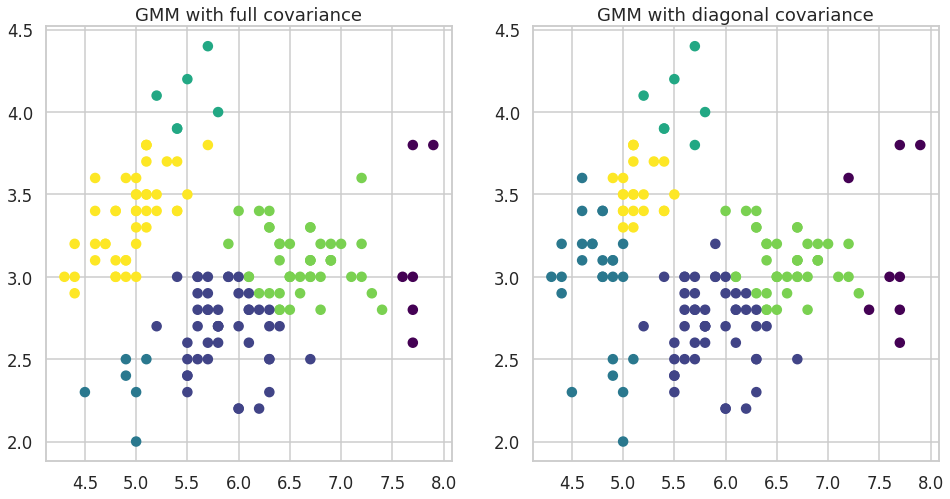

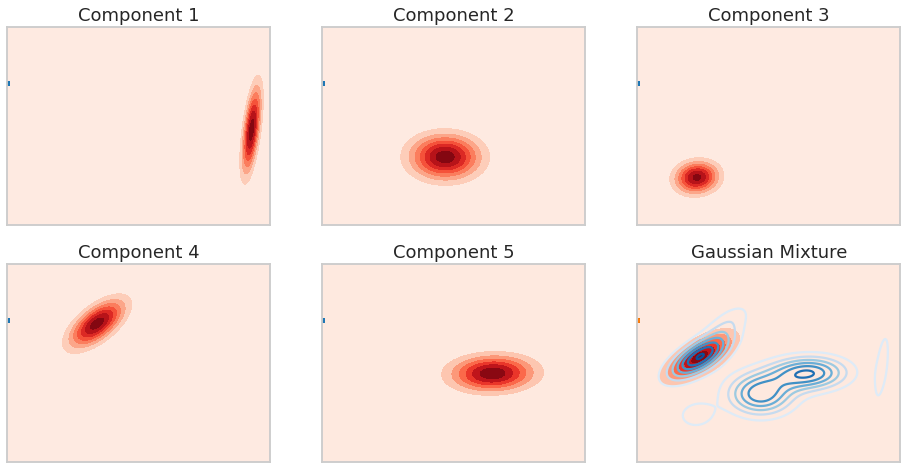

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris()

# Use first two features for clustering
X = iris_data.data[:, :2]

# Instantiate the model with the number of clusters
n_clusters = 6
model = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to the data
model.fit(X)

# Get the cluster labels
labels = model.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clustering with Iris Dataset")
plt.show()

# Fit GMM with full covariance
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
y_pred_full = gmm.fit_predict(X)

# Fit GMM with diagonal covariance
gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
y_pred_diag = gmm.fit_predict(X)

# Plot the probability fit for each covariance type
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_full, cmap='viridis')
plt.title("GMM with full covariance")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_diag, cmap='viridis')
plt.title("GMM with diagonal covariance")
plt.show()

# fit GMM
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(X)

# plot the resulting distribution and the total Gaussian mixture
x, y = np.linspace(4, 8, 500), np.linspace(1.5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]

for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    plt.subplot(2, 3, i+1)
    rv = multivariate_normal(mean, cov)
    plt.contourf(X, Y, rv.pdf(pos), cmap='Reds')
    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
    plt.title(f'Component {i+1}')
    plt.xticks([])
    plt.yticks([])

plt.subplot(2, 3, 6)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
density = np.zeros_like(X)
for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    rv = multivariate_normal(mean, cov)
    density += rv.pdf(pos) * weight
plt.contour(X, Y, density, cmap='Blues')
plt.title('Gaussian Mixture')
plt.xticks([])
plt.yticks([])

plt.show()


## Customer dataset
Repeat all the above on the customer data set 